<a href="https://colab.research.google.com/github/RanggaPD/Undergraduate-Thesis/blob/main/Visualisasi_Data_Fiks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Baca file Excel
a = pd.read_excel("/content/Data_Setelah_Declustering_FIX_BGT.xlsx") # Data sebelum declustering
b = pd.read_excel("/content/Data_Setelah_Declustering_Mainshock_FIX_BGT.xlsx") # Data sesudah declustering

In [ ]:
a.head()

,DATE,LAT,LON,DEPTH,MAG,type
0,2000-01-06 00:56:00,2.0181,98.0467,43.1,5.63000,mainshock
1,2000-02-18 10:13:00,3.8640,97.9372,190.0,5.12554,mainshock
2,2000-03-02 21:11:00,0.4338,98.4284,43.0,5.46506,mainshock
3,2000-03-17 00:52:00,2.6361,97.3845,33.0,5.19674,mainshock
4,2000-04-04 18:08:00,1.9826,98.1436,46.0,5.23576,mainshock


In [ ]:
b.head()

,DATE,LAT,LON,DEPTH,MAG,type
0,2000-01-06 00:56:00,2.0181,98.0467,43.1,5.63000,mainshock
1,2000-02-18 10:13:00,3.8640,97.9372,190.0,5.12554,mainshock
2,2000-03-02 21:11:00,0.4338,98.4284,43.0,5.46506,mainshock
3,2000-03-17 00:52:00,2.6361,97.3845,33.0,5.19674,mainshock
4,2000-04-04 18:08:00,1.9826,98.1436,46.0,5.23576,mainshock


In [ ]:
# Konversi kolom 'DATE' ke datetime
a['DATE'] = pd.to_datetime(a['DATE'])
b['DATE'] = pd.to_datetime(b['DATE'])

# Membuat kolom berdasarkan tahun
a['year'] = a['DATE'].dt.year
b['year'] = b['DATE'].dt.year

# Menghitung frekuensi gempa per tahun
freq_a = a['year'].value_counts().sort_index()
freq_b = b['year'].value_counts().sort_index()

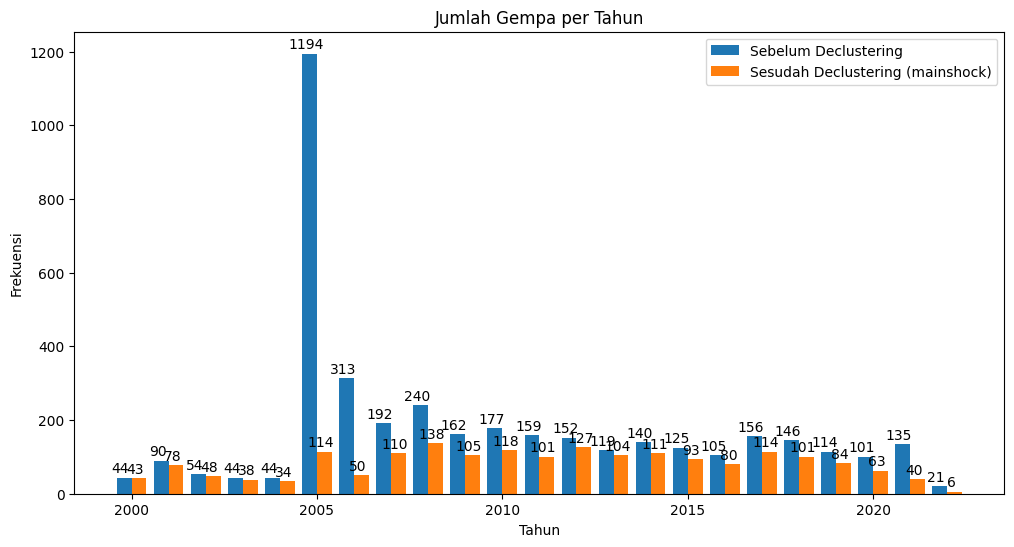

In [ ]:
# Visualisasi Data

# Membuat dataframe untuk plotting
df_a = pd.DataFrame({'year': freq_a.index, 'frequency': freq_a.values})
df_b = pd.DataFrame({'year': freq_b.index, 'frequency': freq_b.values})

# Plot histogram
plt.figure(figsize=(12, 6))

bar_width = 0.4
index = df_a['year']

bars1 = plt.bar(index - bar_width/2, df_a['frequency'], bar_width, label='Sebelum Declustering')
bars2 = plt.bar(index + bar_width/2, df_b['frequency'], bar_width, label='Sesudah Declustering (mainshock)')

# Menambah angka di atas setiap bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - bar_width/4, yval + 5, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - bar_width/4, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.title('Jumlah Gempa per Tahun')
plt.legend()

plt.show()

In [ ]:
# Menghitung jumlah kumulatif gempa per tahun
time_series_a = a['year'].value_counts().sort_index().cumsum()
time_series_b = b['year'].value_counts().sort_index().cumsum()

# Membuat dataframe untuk plotting
df = pd.DataFrame({'year': time_series_a.index, 'time_series_a': time_series_a.values, 'time_series_b': time_series_b.values})

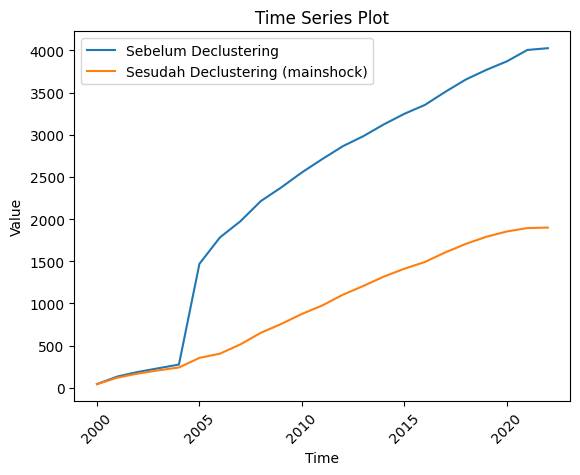

In [ ]:
# Buat Plot
plt.plot(df_a['year'], df['time_series_a'], linestyle = '-', label = 'Sebelum Declustering')
plt.plot(df_b['year'], df['time_series_b'], linestyle = '-', label = 'Sesudah Declustering (mainshock)')
plt.legend()

# Penambahan Judul
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)


plt.show()